In [21]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [22]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [23]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [25]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [26]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [28]:
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
#see columns in the measurement table
columns = inspect.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

AttributeError: 'function' object has no attribute 'get_columns'

In [ ]:
#see columns in the station table
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

In [32]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [33]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [47]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
yearago

# Perform a query to retrieve the data and precipitation scores
dateandprcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= yearago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dateandprcpdf = pd.DataFrame(dateandprcp, columns=["date", "prcp"])

dateandprcpdf.dropna(inplace=True)
dateandprcpdf.sort_values("date")


,date,prcp
0,2016-08-23,0.00
1192,2016-08-23,0.02
704,2016-08-23,0.05
1881,2016-08-23,0.70
361,2016-08-23,0.15
...,...,...
2228,2017-08-22,0.50
360,2017-08-23,0.00
1528,2017-08-23,0.08
1008,2017-08-23,0.00


<AxesSubplot:xlabel='date'>

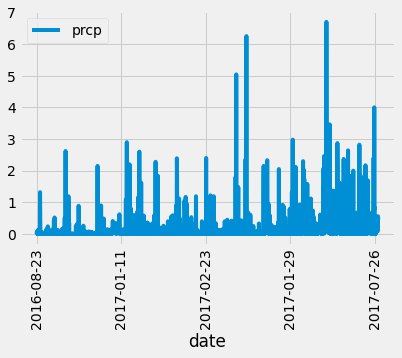

In [48]:
# Use Pandas Plotting with Matplotlib to plot the data
dateandprcpdf.plot(x="date", y="prcp", rot=90)

In [36]:
# Use Pandas to calculate the summary statistics for the precipitation data
Prcp_summary = dateandprcpdf["prcp"].describe()
Prcp_summary

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [37]:
# Design a query to calculate the total number stations in the dataset
totalstations = session.query(Station).distinct().count()
print(totalstations)

9


In [38]:
totalstationsnames = session.query(Station)
for stationname in totalstationsnames:
    print(stationname.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [39]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activestationmean = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(activestationmean)

[(71.66378066378067,)]


In [ ]:
activestationmax = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(activestationmax)

In [ ]:
activestationmin = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(activestationmin)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
activestationlastyear = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= yearago).all()
print(activestationlastyear)

In [ ]:
activestationlastyeardf = pd.DataFrame(activestationlastyear)
activestationlastyeardf.set_index("date", inplace=True)
activestationlastyeardf.dropna(inplace=True)
activestationlastyeardf

In [ ]:
#create histogram
plt.hist(activestationlastyeardf)
plt.show() 

# Close session

In [ ]:
# Close Session
session.close()